# Route Viz Scratch

In [1]:
import pandas as pd
import folium
import geopandas
from geodatasets import get_path
import matplotlib
import contextily as cx
from shapely.geometry import LineString
import osmnx as ox
import networkx as nx

### for future reference, this link might be helpful:
https://medium.com/@gennadiy.obraztsov/folium-strong-introduction-144c2add3c1

In [2]:
feu_galveston = pd.read_csv("../data/FUE_Galveston.csv")
feu_galveston.head()

,Name,Weekly_Dropoff_Totes,Daily_Pickup_Totes,Address,Latitude,Longitude
0,Moody Gardens,0.0,0.0,"1 Hope Blvd, Galveston",29.2736,-94.8523
1,Sugar Bean,1.0,1.0,"11 Evia Main, Galveston",29.2610,-94.8704
2,MAC-IES,1.0,1.0,"1110 23rd Street, Galveston",29.2989,-94.7914
3,Good Dough,1.0,1.0,"1508 39th Street, Galveston",29.2906,-94.8085
4,Porch Cafe,1.0,1.0,"1625 East Beach Drive #2A, Galveston",29.3196,-94.7502


In [63]:
locations_df = feu_galveston[['Latitude', 'Longitude']]
locations_list = locations_df.values.tolist()
galveston_map = folium.Map(location = [29.30135, -94.7977], tiles ='OpenStreetMap', zoom_start=11)
for point in range(0, len(locations_list)):
    folium.Marker(locations_list[point], popup=feu_galveston['Name'][point]).add_to(galveston_map)

# # to add a route line between points in a list, use the following code 
# folium.PolyLine(feu_galveston[['Latitude', 'Longitude']]).add_to(galveston_map) 
# # source: https://deparkes.co.uk/2016/06/03/plot-lines-in-folium/

# galveston_map

In [64]:
place = "Galveston, Texas, USA"
G = ox.graph_from_place(place, network_type='drive')
route_map = ox.plot_route_folium(G, route)
nodes, streets = ox.graph_to_gdfs(G)

/tmp/ipykernel_89/4156825811.py:3: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G, route)


In [ ]:
node0 = ox.nearest_nodes(G_drive,
                                locations_df.iloc[0]['Longitude'], locations_df.iloc[0]['Latitude'])
node1 = ox.nearest_nodes(G_drive,
                                locations_df.iloc[1]['Longitude'], locations_df.iloc[1]['Latitude'])
node2 = ox.nearest_nodes(G_drive,
                                locations_df.iloc[2]['Longitude'], locations_df.iloc[2]['Latitude'])

In [61]:
route1 = nx.shortest_path(G_drive,
                         node0,
                         node1,
                         weight='length')
route2 = nx.shortest_path(G_drive,
                         node1,
                         node2,
                         weight='length')
route_map = ox.plot_route_folium(G_drive, route1)
route_map = ox.plot_route_folium(G_drive, route2, route_map = route_map)
route_map

/tmp/ipykernel_89/1769175467.py:9: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G_drive, route1)
/tmp/ipykernel_89/1769175467.py:10: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  route_map = ox.plot_route_folium(G_drive, route2, route_map = route_map)


In [54]:
route_map.save('route.html')

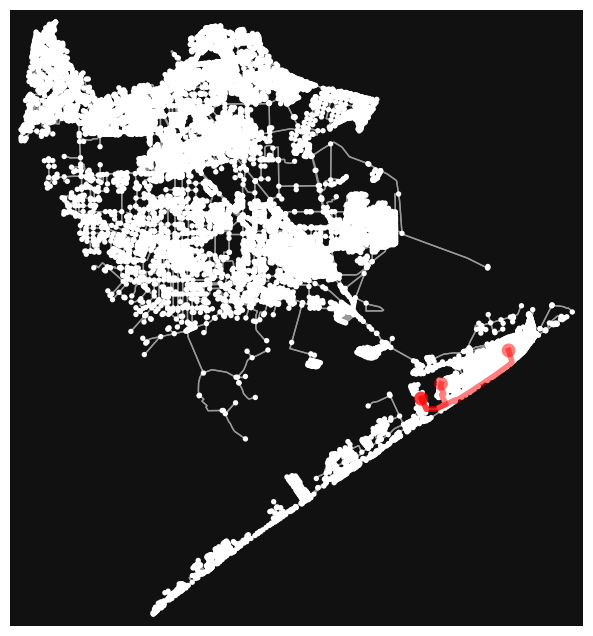

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [55]:
ox.plot_graph_routes(G_drive, [route, route2])

In [ ]:
m = folium.Map(location=ox.geocode(place)) # location=List[lat, lon]
m